# Design of Reinforced Concrete Sections as per IS 456:2000
While reinforced concrete sections can have any shape, the most commonly used sections are the rectangular, flanged (T and L) and circular sections. The simplest of these is the rectangular section. IS 456 prescribes both the limit state method and working stress method. Of these, limit state method is more commonly used, however, certain types of structures are required to be design using working stress method. Some examples of such structures are liquid retaining structures and bridges. We will begin with the limit state method of design and first take up rectangular sections.

The basic parameters required in the design of reinforced concrete sections are characteristic strengths of materials, partial safety factors for materials and the stress strain relations for the materials. All further derivations will be derived from these fundamental parameters. We will use the notations from IS 456:2000

1. Characteristic strength of concrete $f_{ck}$: Depends on the grade of concrete, which can be from M20 to M80. The corresponding characteristic strengths, in N/mm$^2$ are 20 and 80, respectively.
2. Characteristic strength of strength of steel $f_y$: Depends on the grade of steel, which can be one of Mild steel, Fe 415 and Fe 500. The corresponding characteristic strengths, in N/mm$^2$ are 250, 415 and 500 respectively.
3. The partial safety factor for material is 1.5 for concrete and 1.15 for steel.
4. For the limit state of collapse by flexure is defined in terms of the following parameters:
   1. For design purposes, the compressive strength of concrete is obtained as $0.67 \frac{f_{ck}}{\gamma_m} = 0.67 \frac{f_{ck}}{1.5} = 0.446 f_{ck}$
   2. The tensile strength of concrete is ignored
   3. The stresses in the reinforcement are derived from representative stress-strain for the type of steel used. For design purposes, design strength of steel in tension and compression is assumed to be identical and is taken as $\frac{f_y}{\gamma_m} = \frac{f_y}{1.15} = 0.87 f_y$
   4. The strain in tension reinforcement in the section at failure shall not be less than $\frac{f_y}{1.15 E_s} + 0.002 = 0.87 f_y/E_s + 0.002$

## Stress Strain Curve of Concrete
The stress strain curve for concrete for the limit state of collapse in flexure is specified with the help of following parameters:

1. The yield strain of concrete is $\varepsilon_{cy} = 0.002$
2. The maximum strain in concrete is $\varepsilon_{cu} = 0.0035$
3. The stress strain relation is parabolic up to yield and subsequently it is constant up to the maximum strain of 0.0035

## Stress Strain Curve for Mild Steel
The stress strain curve for mild steel is bilinear and is specified as follows:

1. From zero strain to yield strain $0.87 f_y / E_s$, stress varies linearly and the modulus of elasticity is $E_s = 2 \times 10^5$ N/mm$^2$
2. After yield, stress remains constant at $0.87 f_y$
3. Steel is assumed to be infinitely ductile and hence is assumed to be capable of undergoing infinite strains withour breaking

## Stress Strain Curve for Cold Worked Steels
The stress strain curve for cold worked steels is defined in terms of a series of straight lines, with the modulus of elasticity at start same as that for mild steel, namely, $E_s = 2 \times 10^5$ N/mm$^2$. The code specifies stress for different levels of inelastic strain.

-0.01 0.0
0.0 0.0
0.001 0.335
0.002 0.446666666667
0.003 0.446666666667
0.0035 0.446666666667
0.004 0.0


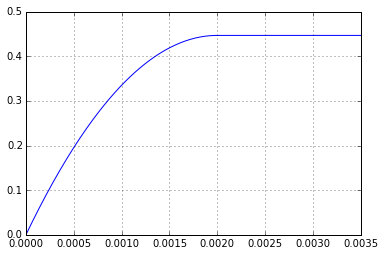

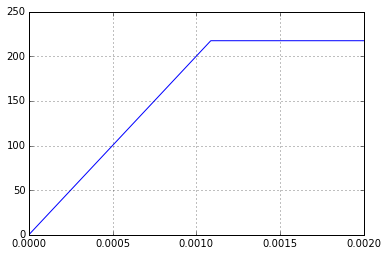

In [40]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

ecy = 0.002
ecu = 0.0035
Es = 2.0e5
gamma_c = 1.5
gamma_s = 1.15

def fc(e):
    if e < 0:
        return 0.0
    elif e < ecy:
        return 0.67 / 1.5 * (e / ecy) * (2.0 - (e / ecy))
    elif e <= ecu:
        return 0.67 / 1.5
    else:
        return 0.0

def interpolate(x, y, xx):
    if xx < x[0]:
        return None
    elif xx > x[-1]:
        return None
    for i in range(len(x)-1):
        x1 = x[i]
        if xx == x1:
            return (y[i])
        elif xx == x[i+1]:
            return y[i+1]
        elif xx < x[i+1]:
            y1 = y[i]
            x2 = x[i+1]
            y2 = y[i+1]
            yy = y1 + (y2 - y1) / (x2 - x1) * (xx - x1)
            return yy

def fs_cw_stress_strain(fy):
    inelstrain = np.array([0.0, 0.0, 0.0001, 0.0003, 0.0007, 0.001, 0.002], dtype=float)
    sigma = np.array([0.0, 0.8, 0.85, 0.90, 0.95, 0.975, 1.0, 1.0], dtype=float)
    eps = np.zeros(sigma.shape, dtype=float)

    for i in range(1,len(inelstrain)):
        sigma[i] *= (fy / 1.15)
        eps[i] = (sigma[i] / Es) + inelstrain[i]
    sigma[-1] = sigma[-2]
    eps[-1] = np.inf
    return eps, sigma

def fs(e, fy, steel='mild steel'):
    e = abs(e)
    esy = fy / gamma_s / Es

    if steel == 'mild steel':
        if e < esy:
            return e * Es
        else:
            return fy / gamma_s
    elif steel == 'cold worked steel':
        pass
    return

if __name__ == '__main__':
    print -0.01, fc(-0.01)
    print 0.0, fc(0.0)
    print 0.001, fc(0.001)
    print 0.002, fc(0.002)
    print 0.003, fc(0.003)
    print 0.0035, fc(0.0035)
    print 0.004, fc(0.004)

    x = np.linspace(0, 0.0035, 201)
    y = np.zeros(x.shape, dtype=float)
    for i in range(len(x)):
        y[i] = fc(x[i])
    plt.plot(x, y)
    plt.ylim(0.0, 0.5)
    plt.grid()
    plt.show()

    x = np.linspace(0, 0.002, 1001)
    y = np.zeros(x.shape, dtype=float)
    for i in range(len(x)):
        y[i] = fs(x[i], 250)
    plt.plot(x, y)
    plt.grid()
    plt.show()

In [42]:
eps, str = fs_cw_stress_strain(415)

print interpolate(eps, str, -0.01)
print interpolate(eps, str, 0)
print interpolate(eps, str, 0.001)
print interpolate(eps, str, 0.002)
print interpolate(eps, str, 0.005)

None
0.0
200.0
327.583148559
360.869565217


## Rectangular Sections

A rectangular section with reinforcement only on the tension side is the simplest possible section. Depending on the dimensions of the cross section, grades of steel and concrete used and the amount of reinforcement provided, the section can be classified as an under-reinforced, balanced or an over-reinforced section. If the area of reinforcement provided is such that steel reaches its specified minimum strain at the same time when strain in the extreme concrete fibre reaches its breaking strain, the section is said to be **balanced**.

On the other hand, if when concrete reaches its breaking strain steel has not yet reached its minimum specified strain, section is said to be **over-reinforced**. This occurs when the area of tension reinforcement provided is more than what is required for a balanced section. Concrete fails before steel, and being a brittle material, section fails without giving sufficient advance warning.

If the strain in steel is more than the specified minimum starin when concrete reaches its breaking strain, section is said to be **under-reinforced**. This occurs when the area of reinforcement provided is less than that required by a balanced section. In this case, steel fails first, but being a ductile material, it does not break immediately. It is capable of undergoing large deformations beyond yield without breaking, thereby giving concrete sufficient opportunity to reach its breaking strain. Failure of such a section is gradual and there is sufficient advance warning before the section collapses.

It is a preferred method of design to provde a depth greater than the depth of a balanced section. Thus the capacity of the section is greater than the required design moment if the section is designed as a balanced section. It is thus possible to generate the required resistance equal to the design moment by providing area of reinforcement less than that for a balanced section, thereby making the section under-reinforced.

### Balanced Section
A balanced section must have a specified depth if it is to generate a resisting moment exactly equal to the design moment and have the required strains in tension steel and concrete at the same instant of time. This can be obtained by equating the ratio of the sides of the similar triangles.

$$\frac{x_{u, max}}{0.0035} = \frac{d - x_{u, max}}{0.002 + \frac{0.87 f_y}{E_s}}$$

Solving for $x_{u, max}$ we get $\frac{x_{u, max}}{d} = \frac{0.0035}{0.0055 + \frac{0.87 f_y}{E_s}}$

A rectangular section having this exact depth would be a balanced section when it is provided with the exact area of steel required by a balanced section, obtained by equating the magnitudes of the compressive force in concrete with the tensile force in steel.

$$A_{st, lim} (0.87 f_y) = 0.36 f_{ck} b x_{u, max}$$

Solving for $A_{st, lim}$, we get $A_{st, lim} = \frac{0.36 f_{ck} b x_{u, max}}{0.87 f_y}$. This can be written as

$$p_{t, lim} =  \frac{A_{st, lim}}{b d} \cdot 100 = \frac{0.36 f_{ck}}{0.87 f_y} \cdot \frac{x_{u, max}}{d} \cdot 100$$

When the above exact area of steel is provided, the balanced section generates the maximum possible moment of resistance (without providing compression steel). This moment can be calculated by the moment due to the couple generated by the compressive force in concrete and tensile force in steel.

$$M_{u, lim} = 0.87 f_y A_{st, lim} \left( d - 0.416 x_{u, max} \right) = 0.36 f_{ck} b x_{u, max} \left( d - 0.416 x_{u, max} \right) $$

This can be rearranged as follows:

$$\frac{M_{u, lim}}{f_{ck} b d^2} = 0.36 \frac{x_{u, max}}{d}  \left( 1 - 0.416 \frac{x_{u, max}}{d} \right) $$

In [2]:
def k1(fy):
    return (0.0035 / (0.0055 + 0.87 * fy / 2e5))

def k2(fy):
    kk1 = k1(fy)
    return (0.36 * kk1 * (1 - 0.416 * kk1))

def k3(fy):
    kk1 = k1(fy)
    return (36 / 0.87 * kk1)

fy = [250, 415, 500]
for ffy in fy:
    print "%6d %8.3f %8.3f %8.3f" % (ffy, k1(ffy), k2(ffy), k3(ffy))

   250    0.531    0.149   21.985
   415    0.479    0.138   19.825
   500    0.456    0.133   18.870


## Under-reinforced Sections

However, it is not a good idea to design a section as balanced, for the following reasons:

1. It is never possible to provide the exact amout of steel that is required by a balanced section as bar diameters are discrete and providing the required area of steel may require providing fraction of a bar, which is impossible.
2. If we provide more steel than that required by a balanced section, section will become over-reinforced and while it can generate the required moment of resistance, its failure is brittle, which is undesirable.
2. If we provide less steel than that required by a balanced section, the maximum moment of resistance it can generate is less than the design moment and hence the design is unsafe.

It is therefore a better approach to provde a depth more than that required by a balanced section and provide area of steel sufficient to generate the required moment of resistance. Hence the actual depth of the neutral axis provided is $x_u > x_{u, max}$. Equating the compressive and tensile forces, we get

$$\frac{p_t}{100} \cdot b d (0.87 f_y) = 0.36 f_{ck} b x_u$$

Therefore

$$\frac{x_u}{d} = \frac{p_t}{100} \frac{0.87 f_y}{0.36 f_{ck}} = \frac{p_t}{100} 0.4138 \frac{f_y}{f_{ck}}$$

$$M_u = 0.36 f_{ck} b x_u (d - 0.416 x_u)$$

$$\frac{M_u}{f_{ck} b d^2} = 0.36 \frac{x_u}{d} \left( 1 - 0.416 \frac{x_u}{d} \right)$$

Substituting $\frac{x_u}{d} = \frac{p_t}{100} 0.4138 \frac{f_y}{f_{ck}}$, we get

$$\frac{M_u}{0.87 f_y b d^2} = 0.$$

$$\left( \frac{p_t}{100} \right)^2 - 5.8092 \frac{f_{ck}}{f_y} \frac{p_t}{100} + 6.6788 \frac{f_{ck}}{f_y^2} \frac{M_u}{b d^2} = 0$$

$$\frac{p_t}{100} = 2.9046 \frac{f_{ck}}{f_y} \pm \sqrt{\left( 2.9046 \frac{f_{ck}}{f_y} \right)^2 - 6.6788 \frac{f_{ck}}{f_y^2} \frac{M_u}{b d^2}}$$

In [3]:
def pt(Mu, b, d, fck, fy):
    a = 2.9046 * fck / fy
    b = math.sqrt(a**2 - (6.6788*fck*Mu / (fy**2 * b * d**2)))
    return a - b

Mu = 80e6
b = 230
d  =415
fck = 20
fy = 415
p = pt(Mu, b, d, fck, fy)
print p, p/100 * b * d

0.00571151970002 5.45164555367


# Area of Concrete Stress Block

Strain distribution across the depth of a cross section is assumed tb vary linearly. At the limit state of collapse in flexure, strain in the extreme compression edge is $\epsilon_{cu}=0.0035$, assuming the section as under reinforced. Stress distribution in concrete varies parabolically from $0 \leq \epsilon_c \leq \epsilon_{cy}$, where $\epsilon_{cy}=0.002$. Stress distribution in concrete is constant from $\epsilon_{cy} \leq \epsilon_c \leq \epsilon_{cu}$, where $\epsilon_{cu}=0.0035$. The yield stress in concrete is $f_{cy}= \frac{0.67}{1.5} f_{ck} = 0.446 f_{ck}$. If $x_u$ is the depth of the neautral axis from the compression edge, then depth of parabolic portion of stress block is $\frac{4}{7} x_u$ and depth of the uniform portion of the stress block is $\frac{3}{7} x_u$. In order to compute the area and centroid of the stress block, let us consider the case when depth of neutral axis below the compression edge is given as $x_u$ and we wish to compute the area and centroid of the stress block up to a distance $x$ from the neutral axis.

To simplify the derivation of the equations, let us use the following notations: $0 \leq x \leq R=\frac{4}{7} x_u$ is the parabolic portion of the stress block and $R \leq x \leq \frac{3}{4} R$ is the rectangular portion of the stress block. STress starts with zero, varies parabolicaly and reaches the maximum value $h = \frac{0.67}{1.5} f_{ck} = 0.446 f_{ck}$ at $x=R$. Aftre that stress remains constant over the rectangular portion.

Let us derive expressions for area of stress block and distance of centroid of stress block from neutral axis for portion of the stress block starting from $x_0 \leq x \leq (R + \frac{3}{4}R)$, where $x$ is measured from the neutral axis.

\begin{align*}
f_c(x) &= 
  \begin{cases}
    h \left[ 2 \left( \frac{x}{R} \right) - \left( \frac{x}{R} \right)^2 \right] & \text{ if } 0 \leq x \leq R \\
    h & \text{ if } R \leq x \leq \frac{7}{4} R
  \end{cases}
\end{align*}

The area of the stress block for $0 \leq x \leq R$ can be written as
$$
A(x_0) = \int_{0}^{x_0} f_c(x) dx = h x_0 \left[\left(\frac{x_0}{R} \right) - \frac{1}{3} \left( \frac{x_0}{R} \right)^2  \right] \quad \text{ for } 0 \leq x_0 \leq R
$$
and first moment of area about the neutral axis can be written as
$$
A \bar{x} = \int_{0}^{x_0} f_c(x) x dx = h x_0^2 \left[ \frac{2}{3} \frac{x_0}{R} - \frac{1}{4} \left( \frac{x_0}{R} \right)^2 \right]
$$
Distance of the centroid of the parabolic portion of the stress block is given as
$$
\bar{x}(x_0) = \frac{A \bar{x}}{A} = x_0 \frac{\left[ \frac{2}{3} \frac{x_0}{R} - \frac{1}{4} \left( \frac{x_0}{R} \right)^2 \right]}{\left[ \frac{x_0}{R} - \frac{1}{3} \left( \frac{x_0}{R} \right)^2 \right]}
$$
For the particular case when $x_0 = R$, we have
\begin{align*}
A(R) &= \frac{2}{3} h R \\
\bar{x}(R) &= \frac{5}{8} R
\end{align*}
Knowing $R=\frac{4}{7} x_u$, and $h = \frac{1}{1.5^2} f_{ck} = \left( \frac{2}{3} \right)^2 f_{ck}$, we can now find the area and centroid of the full stress block:
\begin{align*}
A &= \frac{3}{4} hR + \frac{2}{3} hR = \frac{17}{12} hR = \frac{68}{189} f_{ck} x_u \approx 0.36 f_{ck} x_u \\
A \bar{x} &= \frac{3}{4} hR \left(R + \frac{1}{2} \frac{3}{4} R  \right) + \frac{2}{3} hR \frac{5}{8} R = \frac{139}{96} hR^2 \\
\bar{x} &= \frac{A \bar{x}} {A} = \frac{139}{96} \frac{12}{17} R = \frac{139}{136} R = \frac{139}{238} x_u \approx 0.584 x_u
\end{align*}
Distance of the centroid from the compression edge can be obtained as
$$
\bar{x} = x_u - \frac{139}{238} x_u = \frac{99}{238} x_u \approx 0.416 x_u
$$

Let us determine the area and centroid for the case when the a part of the stress block from the compression edge up to a distance $x_0$ from the neutral axis is considered. The equations are:
\begin{align*}
A &= \left( \frac{3}{4} h R \right) + \left( \frac{2}{3} hR \right) - hx_0 \left[ \left( \frac{x_0}{R} \right) - \frac{1}{3} \left(  \frac{x_0}{R} \right)^2 \right] \\
A \bar{x} &= \left( \frac{3}{4} h R \right) \left( \frac{11}{8} R \right) + \left( \frac{2}{3} hR \right) \left( \frac{5}{8} R \right) - hx_0^2 \left[ \left( \frac{x_0}{R} \right) - \frac{1}{3} \left(  \frac{x_0}{R} \right)^2 \right] \frac{\left[ \frac{2}{3} \frac{x_0}{R} - \frac{1}{4} \left( \frac{x_0}{R} \right)^2 \right]}{\left[ \frac{x_0}{R} - \frac{1}{3} \left( \frac{x_0}{R} \right)^2 \right]}
\end{align*}


In [2]:
from __future__ import division, print_function
from math import pi

class ConcStressBlock(object):
    def __init__(self, h, xu):
        self.h = h
        self.xu = xu
        self.R = 4 / 7 * self.xu

    def __str__(self):
        s = "Concrete Stress Block, yield stress = %.3f, depth = %.2f" % (self.h, self.xu)
        return s

    def set_xu(self, xu):
        self.xu = xu
        self.R = 4.0/7.0*self.xu
        return

    def rect_area(self):
        return 3/4*self.h*self.R

    def rect_firstmom(self):
        return 11/8*self.R

    def par_area(self, x):
        xr = x / self.R
        return self.h * x * (xr - 1/3*xr**2)

    def par_firstmom(self, x):
        xr = x / self.R
        return self.h * x * x * (2/3*xr - xr*xr/4)

    def area(self, x, b=1.0):
        if x > self.R:
            A = self.h * (self.xu - x)
        else:
            A = 17/12*self.h*self.R - self.par_area(x)
        return A * b

    def firstmom(self, x, b=1.0):
        if x > self.R:
            Ax = self.h * (self.xu - x) * (self.R + (self.xu - x)/2.0)
        else:
            Ax = 139/96*self.h*self.R**2 - self.par_firstmom(x)
        return Ax * b

    def centroid_na(self, x):
        A = self.area(x)
        Ax = self.firstmom(x)
        return Ax / A

    def centroid(self, x):
        return 1.0 - self.centroid_na(x)


def calc_mom_curv(b, d, dd, fck, fy, Asc, Ast, xu, ec=0.0035):
    es = ec * (d - xu) / xu
    esc = ec * (xu - dd) / xu
    return esc, es

csb = ConcStressBlock(0.67/1.5, 1.0)
print(csb)
print(csb.par_area(4/7))
print(csb.par_firstmom(4/7))
print(csb.rect_area(), csb.rect_firstmom())
print(csb.area(0.0))
print(csb.firstmom(0))
print(csb.centroid(0), csb.centroid_na(0))
print(calc_mom_curv(230, 415, 40, 20, 415, 3*pi*16**2/4, 4*pi*20**2/4, 150, 0.0035))


Concrete Stress Block, yield stress = 0.447, depth = 1.00
0.170158730159
0.0607709750567
0.191428571429 0.785714285714
0.361587301587
0.211179138322
0.415966386555 0.584033613445
(0.0025666666666666667, 0.006183333333333333)
